In [1]:
import quantities as pq
import matplotlib.pyplot as plt
import ConnectionAnalyzer as ca
import neo
import numpy as np
import cPickle

In [2]:
STAPath = 'Z:\\Robert\\INT_connectivity\\SiProbe\\ProbeBird_101917\\SiProbe\\Continuous_400_cut_v1\\clusters_run1\\STA_INH\\cell1\\'

In [4]:
# cluster845Data = cPickle.load(open(STAPath+'STSnippets_Cluster_845.pkl', 'rb'))
# cluster243Data = cPickle.load(open(STAPath+'STSnippets_Cluster_243.pkl', 'rb'))
# cluster277Data = cPickle.load(open(STAPath+'STSnippets_Cluster_277.pkl', 'rb'))
# cluster389Data = cPickle.load(open(STAPath+'STSnippets_Cluster_389.pkl', 'rb'))
cluster82Data = cPickle.load(open(STAPath+'STSnippets_Cluster_82.pkl', 'rb'))

In [5]:
# STA_845 = np.mean(cluster845Data.snippets, axis=0)
# STA_SE_845 = np.std(cluster845Data.snippets, axis=0)/np.sqrt(len(cluster845Data.snippets))
# STA_243 = np.mean(cluster243Data.snippets, axis=0)
# STA_SE_243 = np.std(cluster243Data.snippets, axis=0)/np.sqrt(len(cluster243Data.snippets))
# STA_277 = np.mean(cluster277Data.snippets, axis=0)
# STA_SE_277 = np.std(cluster277Data.snippets, axis=0)/np.sqrt(len(cluster277Data.snippets))
# STA_389 = np.mean(cluster389Data.snippets, axis=0)
# STA_SE_389 = np.std(cluster389Data.snippets, axis=0)/np.sqrt(len(cluster389Data.snippets))
STA_82 = np.mean(cluster82Data.snippets, axis=0)
STA_SE_82 = np.std(cluster82Data.snippets, axis=0)/np.sqrt(len(cluster82Data.snippets))

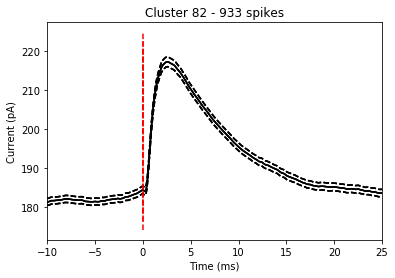

In [8]:
timeAxis = np.linspace(-10, 25, len(STA_82))
plt.figure(1)
plt.plot(timeAxis, STA_82, 'k')
plt.plot(timeAxis, STA_82+STA_SE_82, 'k--')
plt.plot(timeAxis, STA_82-STA_SE_82, 'k--')
plt.plot([0, 0], plt.ylim(), 'r--')
plt.xlim([-10, 25])
plt.xlabel('Time (ms)')
plt.ylabel('Current (pA)')
titleStr82 = 'Cluster 82 - %d spikes' % len(cluster82Data.snippets)
plt.title(titleStr82)
plt.show()
# timeAxis = np.linspace(-10, 25, len(STA_845))
# plt.figure(1)
# plt.plot(timeAxis, STA_845, 'k')
# plt.plot(timeAxis, STA_845+STA_SE_845, 'k--')
# plt.plot(timeAxis, STA_845-STA_SE_845, 'k--')
# plt.plot([0, 0], plt.ylim(), 'r--')
# plt.xlim([-10, 25])
# plt.xlabel('Time (ms)')
# plt.ylabel('Current (pA)')
# titleStr845 = 'Cluster 845 - %d spikes' % len(cluster845Data.snippets)
# plt.title(titleStr845)
# plt.figure(2)
# plt.plot(timeAxis, STA_243, 'k')
# plt.plot(timeAxis, STA_243+STA_SE_243, 'k--')
# plt.plot(timeAxis, STA_243-STA_SE_243, 'k--')
# plt.plot([0, 0], plt.ylim(), 'r--')
# plt.xlim([-10, 25])
# plt.xlabel('Time (ms)')
# plt.ylabel('Current (pA)')
# titleStr243 = 'Cluster 243 - %d spikes' % len(cluster243Data.snippets)
# plt.title(titleStr243)
# plt.figure(3)
# plt.plot(timeAxis, STA_277, 'k')
# plt.plot(timeAxis, STA_277+STA_SE_277, 'k--')
# plt.plot(timeAxis, STA_277-STA_SE_277, 'k--')
# plt.plot([0, 0], plt.ylim(), 'r--')
# plt.xlim([-10, 25])
# plt.xlabel('Time (ms)')
# plt.ylabel('Current (pA)')
# titleStr277 = 'Cluster 277 - %d spikes' % len(cluster277Data.snippets)
# plt.title(titleStr277)
# plt.figure(4)
# plt.plot(timeAxis, STA_389, 'k')
# plt.plot(timeAxis, STA_389+STA_SE_389, 'k--')
# plt.plot(timeAxis, STA_389-STA_SE_389, 'k--')
# plt.plot([0, 0], plt.ylim(), 'r--')
# plt.xlim([-10, 25])
# plt.xlabel('Time (ms)')
# plt.ylabel('Current (pA)')
# titleStr389 = 'Cluster 389 - %d spikes' % len(cluster389Data.snippets)
# plt.title(titleStr389)
# plt.show()

In [18]:
cluster979Data = cPickle.load(open(STAPath+'STSnippets_Cluster_979.pkl', 'rb'))
cluster845Data = cPickle.load(open(STAPath+'STSnippets_Cluster_845.pkl', 'rb'))

In [9]:
import ast
experimentInfoName = 'Z:\\Robert\\INT_connectivity\\SiProbe\\ProbeBird_101917\\experiment_101917_v1.info'
with open(experimentInfoName, 'r') as dataFile:
    experimentInfo = ast.literal_eval(dataFile.read())

62


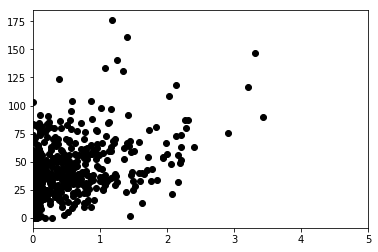

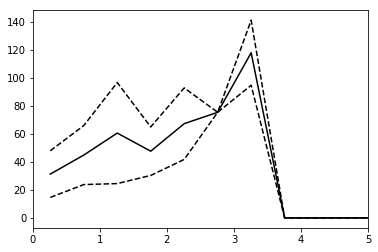

In [28]:
tSpikeBin = int(0.01*experimentInfo['WC']['SamplingRate'])
ampStartBin = int(0.01*experimentInfo['WC']['SamplingRate'])
ampStopBin = int(0.013*experimentInfo['WC']['SamplingRate'])
maxSpike = -1
ISIs = np.diff(cluster82Data.snippetSpikeTimes)
print len(ISIs[np.where(ISIs < 0.001)])
amps = []
for i, snippet in enumerate(cluster82Data.snippets):
    if not i:
        continue
    amp = np.max(snippet[ampStartBin:ampStopBin]) - snippet[ampStartBin]
    amps.append(amp)
amps = np.array(amps)
minBin = 0.01
maxBin = 10
binSize = 0.5
currentBin = minBin
avgAmp = []
stdAmp = []
while currentBin < maxBin:
    selection = np.where((ISIs >= currentBin)*(ISIs < currentBin + binSize))
    if len(selection[0]):
        avgAmp.append(np.mean(amps[selection]))
        stdAmp.append(np.std(amps[selection]))
    else:
        avgAmp.append(0)
        stdAmp.append(0)
    currentBin += binSize
avgAmp = np.array(avgAmp)
stdAmp = np.array(stdAmp)
ampBins = np.linspace(minBin + 0.5*binSize, maxBin - 0.5*binSize, len(avgAmp))
# amps_ = amps[np.where(amps > 10)]
# ISIs_ = ISIs[np.where(amps > 10)]
plt.figure(1)
plt.plot(ISIs, amps, 'ko')
# plt.semilogx(ISIs, amps, 'ko')
plt.xlim([0.005, 5])
# plt.ylim([1, 200])
plt.figure(2)
# plt.errorbar(ampBins, avgAmp, stdAmp)
plt.plot(ampBins, avgAmp, 'k-')
plt.xlim([0.005, 5])
plt.plot(ampBins, avgAmp + stdAmp, 'k--')
plt.plot(ampBins, avgAmp - stdAmp, 'k--')
plt.show()

In [ ]:
import os.path
dataFolder = 'C:\\Users\\User\\Desktop\\Continuous_400_cut_v1\\'
misalignmentFilename = os.path.join(dataFolder, 'misaligned_clusters.txt')
misalignedClusters = {}
if os.path.exists(misalignmentFilename):
    with open(misalignmentFilename, 'r') as misalignmentFile:
        for line in misalignmentFile:
            splitLine = line.strip().split('\t')
            try:
                mainCluster = int(splitLine[0])
                mergeClusterStr = splitLine[1].split(',')
                mergeClusters = [int(cluster) for cluster in mergeClusterStr]
                misalignedClusters[mainCluster] = mergeClusters
            except ValueError:
                continue
print misalignedClusters

{0: [48], 82: [210, 331, 377, 387, 389, 435, 447, 449, 451]}


In [30]:
import ConnectionAnalyzer as ca
import ast
clusteringSrcFolder = 'E:\\User\\project_src\\physiology\\Clustering'
experimentInfoName = 'C:\\Users\\User\\Desktop\\experiment_101917.info'
with open(experimentInfoName, 'r') as dataFile:
    experimentInfo = ast.literal_eval(dataFile.read())
SiProbeDataFolder = experimentInfo['SiProbe']['DataBasePath']
clusters = ca.reader.read_clusters(SiProbeDataFolder, clusteringSrcFolder, 'dev', 'good', experimentInfo['SiProbe']['SamplingRate'])

NameError: name 'os' is not defined